In [7]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Read CSV file with space delimiter
df = pd.read_csv('Earthquake_Data.csv', delimiter=r'\s+')

# Print the first 5 rows of the data frame
display(df)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)",
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18030 entries, 1966-07-01 09:41:21.820000 to 2007-12-28 23:20:28.120000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    18030 non-null  float64
 1   Longitude(deg)   18030 non-null  float64
 2   Depth(km)        18030 non-null  float64
 3   Magnitude(ergs)  18030 non-null  float64
 4   Magnitude_type   18030 non-null  object 
 5   No_of_Stations   18030 non-null  int64  
 6   Gap              18030 non-null  int64  
 7   Close            18030 non-null  int64  
 8   RMS              18030 non-null  float64
 9   SRC              18030 non-null  object 
 10  EventID          18030 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ MB


In [11]:
file_name = 'Earthquake_data_processed.xlsx'

# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [12]:
import warnings
warnings.filterwarnings('ignore')


In [13]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude(ergs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:

from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 0.02, MSE: 0.19


In [16]:
# Predict on new data
new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)


New predictions: [3.447483   3.33027751]


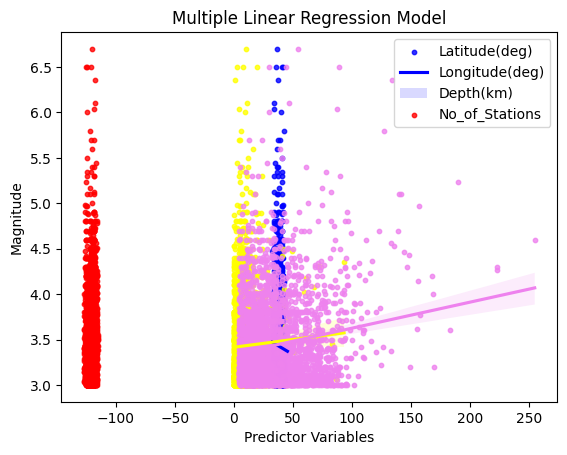

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Latitude(deg)'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude(deg)'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth(km)'], y=y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['No_of_Stations'], y=y_test, color='violet', scatter_kws={'s': 10})
plt.legend(labels=['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

In [18]:

from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)


Test score: -2.6273211125904736


In [19]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -2.63, MSE: 0.70


In [20]:

# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [4.030623   3.68010607]


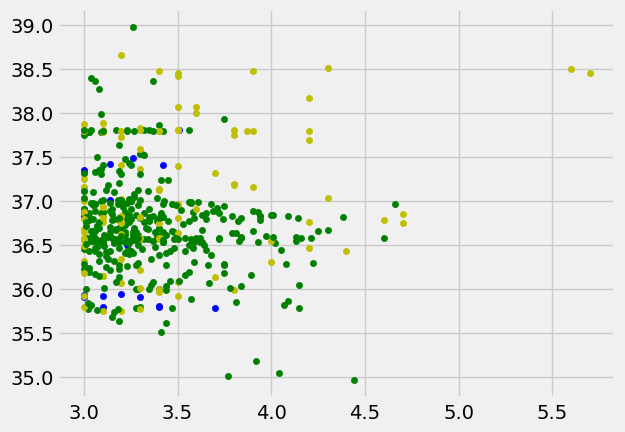

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

subset_size = 500

# modify the column names based on the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:subset_size].values
classes = df['Magnitude_type'][:subset_size].values

# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf')

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()